In [3]:
import tensorflow  as tf

In [4]:
import cv2
import imghdr

<ipython-input-4-290956b76b78>:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:
dir="/content/drive/My Drive/Colab Notebooks/data"


In [12]:
data=tf.keras.utils.image_dataset_from_directory(dir)
data


Found 305 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
data_iterate=data.as_numpy_iterator() #Converts a TensorFlow dataset into a NumPy-style iterator so that you can manually iterate through it.
data_iterate

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7c237e91b4d0>)

In [15]:
batch=data_iterate.next() #retrieving the next batch of images and labels from your dataset.
# batch

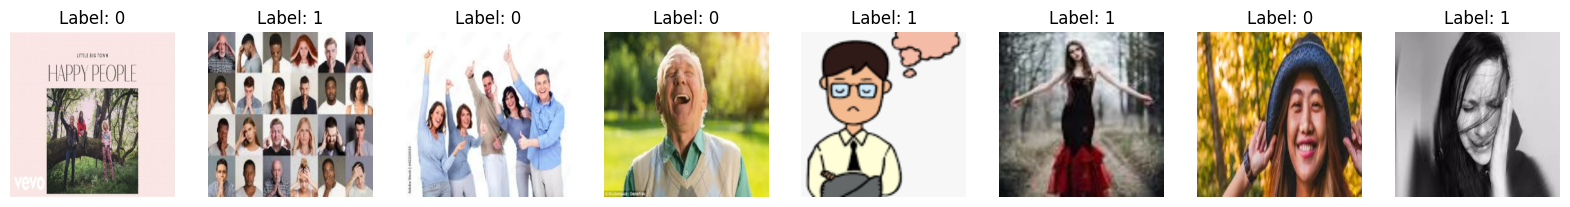

In [22]:
import matplotlib.pyplot as plt

# Create a figure with 8 subplots in a row
fig, ax = plt.subplots(ncols=8, figsize=(20, 20))

# Unpack batch into images and labels
images, labels = batch

# Loop through the first 8 images and plot them
for i in range(8):
    ax[i].imshow(images[i].astype(int))  # Ensure correct format for image display
    ax[i].title.set_text(f"Label: {labels[i]}")  # Set title to class label
    ax[i].axis("off")  # Hide axes for better visualization

plt.show()


In [23]:
## Scale data

In [25]:
# x / 255 → Scales image pixel values from [0, 255] to [0, 1] (important for CNN training).
# y (labels) → Remains unchanged.
data=data.map(lambda x,y:(x/255,y))
data.as_numpy_iterator().next()

In [26]:
## split data

In [27]:
'''This code is splitting the dataset into:
70% for training
20% for validation
10% for testing'''
train=int(len(data)*.7)
val=int(len(data)*.2)
test=int(len(data)*.1)

In [30]:
test

1

In [32]:
tr=data.take(train) #Takes the first train_size batches.
va=data.skip(train).take(val) #Skips training data and takes validation batches.
te=data.skip(train+val).take(test) #Skips training + validation, then takes test batches.

In [34]:
print(f"Train set batches: {len(tr)}")
print(f"Validation set batches: {len(va)}")
print(f"Test set batches: {len(te)}")


Train set batches: 7
Validation set batches: 2
Test set batches: 1


In [35]:
## model building

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [38]:
model=Sequential()

In [39]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))  # 16 filters,kerenel size=3*3,stride=1,rgb image(3) of 256*256
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
## Train

In [43]:
logdir='logs' #model training logs stored here

In [44]:
tfcall=tf.keras.callbacks.TensorBoard(log_dir=logdir) ##logs training process

In [45]:
hist=model.fit(tr,epochs=20,validation_data=va,callbacks=[tfcall])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.5110 - loss: 0.8380 - val_accuracy: 0.6250 - val_loss: 0.6823
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.6162 - loss: 0.6798 - val_accuracy: 0.5312 - val_loss: 0.6927
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 32s 5s/step - accuracy: 0.6025 - loss: 0.6135 - val_accuracy: 0.6406 - val_loss: 0.5766
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.6456 - loss: 0.5785 - val_accuracy: 0.7812 - val_loss: 0.4661
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.7981 - loss: 0.4599 - val_accuracy: 0.7656 - val_loss: 0.4480
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.7824 - loss: 0.4046 - val_accuracy: 0.8438 - val_loss: 0.3251
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 0.9181 - loss: 0.2593 - val_accuracy: 0.9219 - val_loss: 0.2552
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.9273 - loss: 0.1886 - val_accuracy: 0.9844 - val_loss: 0.1135
Epoch 9/

In [46]:
## plot performance

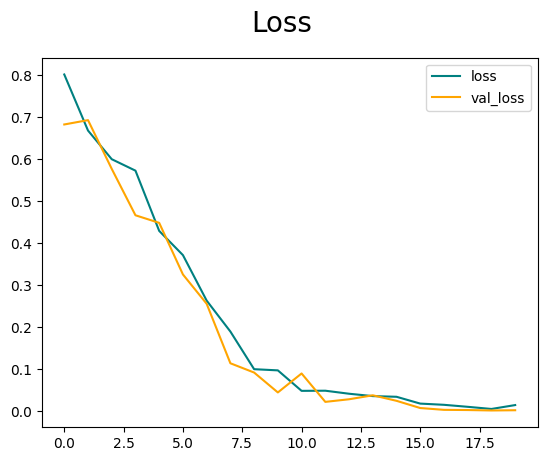

In [47]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper right')
plt.show()


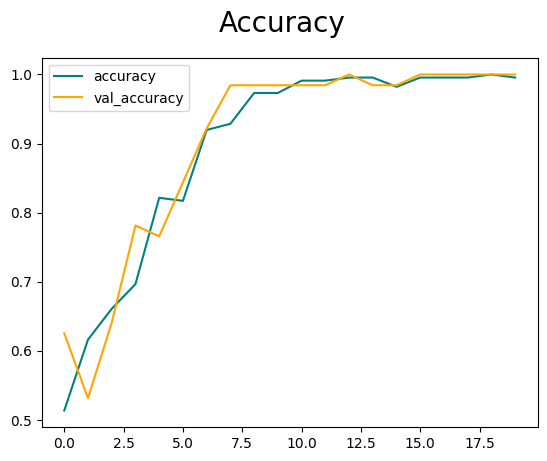

In [48]:
## accuracy plot
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [49]:
## evaluate

In [50]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [51]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [52]:
for batch in te.as_numpy_iterator():  #evaluation on test data
  x,y=batch #x=images,y=labels
  yhat=model.predict(x)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


In [53]:
print(pre.result(),re.result(),acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [54]:
## test

In [55]:
import cv2

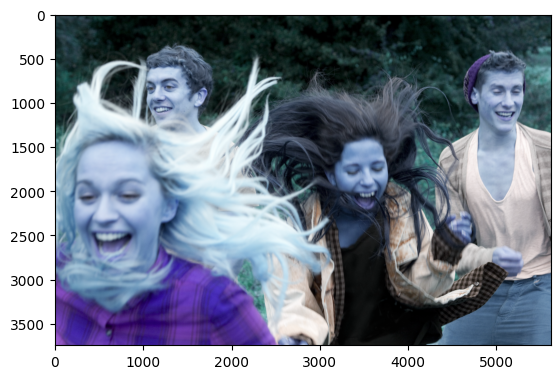

In [56]:
img=cv2.imread('/content/drive/My Drive/Colab Notebooks/154006829.jpg')
plt.imshow(img)
plt.show()

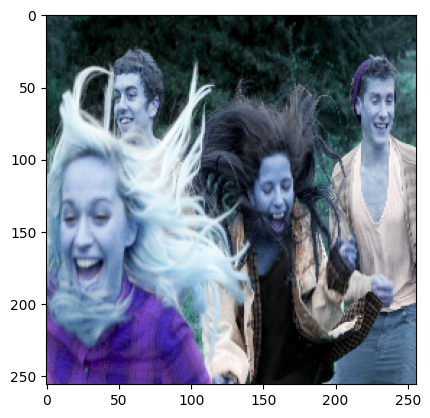

In [57]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [58]:
yhat=model.predict(np.expand_dims(resize/255,0))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


array([[0.2963725]], dtype=float32)

In [59]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [60]:
## save model

In [61]:
from tensorflow.keras.models import load_model


In [62]:
model.save('/content/drive/My Drive/Colab Notebooks/cnnmodel.h5')

In [63]:
new_model=load_model('/content/drive/My Drive/Colab Notebooks/cnnmodel.h5')

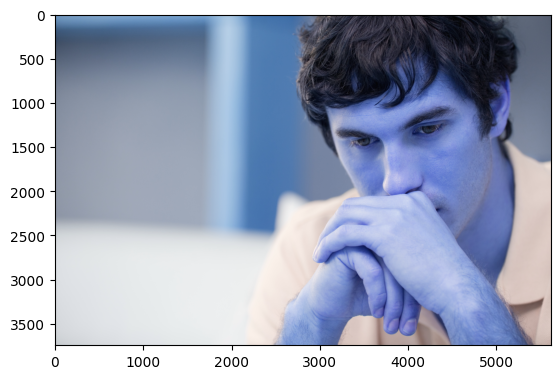

In [64]:
img=cv2.imread('/content/drive/My Drive/Colab Notebooks/8iAb9k4aT.jpg')
plt.imshow(img)
plt.show()

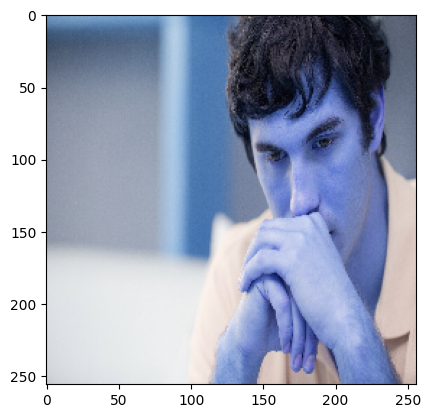

In [65]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [67]:
x=new_model.predict(np.expand_dims(resize/255,0))
x

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


array([[0.9988359]], dtype=float32)

In [68]:
if x > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
